In [1]:
! pip install sklearn-pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 

import torch # For building the networks 
import torchtuples as tt # Some useful functions
# change pycox import datasets and df= read.csv

In [2]:
unpickled_days260_curve_wait=pd.read_pickle("D:/UNOS_NEW/days260_curve_wait2_redo.pkl")
unpickled_days260_curve_wait

,0
0.000000,0.999960
20.277777,0.996221
40.555554,0.992481
60.833331,0.988741
81.111108,0.985001
...,...
1743.888867,0.286816
1764.166650,0.219592
1784.444434,0.152368
1804.722217,0.085144


In [3]:
days260_curve_wait=unpickled_days260_curve_wait.iloc[0:14,]

In [4]:
days260_curve_wait

,0
0.000000,0.999960
20.277777,0.996221
40.555554,0.992481
60.833331,0.988741
81.111108,0.985001
101.388885,0.981261
121.666663,0.977522
141.944440,0.973782
162.222217,0.970042
182.499994,0.966302


In [5]:
unpickled_days260_curve_no=pd.read_pickle("D:/UNOS_NEW/days260_curve_no2_redo.pkl")
unpickled_days260_curve_no

,0
0.000000,0.998985
20.277777,0.984650
40.555554,0.970315
60.833331,0.955980
81.111108,0.941646
...,...
1743.888867,0.150088
1764.166650,0.125522
1784.444434,0.100955
1804.722217,0.076389


In [6]:
days260_curve_no_3yr=unpickled_days260_curve_no.iloc[1:41,]

In [7]:
days260_curve_no_3yr

,0
20.277777,0.984650
40.555554,0.970315
60.833331,0.955980
81.111108,0.941646
101.388885,0.927311
121.666663,0.912976
141.944440,0.898641
162.222217,0.884306
182.499994,0.869971
202.777771,0.855636


In [8]:
days260_curve_no_3yr=days260_curve_no_3yr*0.933779

In [9]:
days260_curve_no_3yr

,0
20.277777,0.919446
40.555554,0.906060
60.833331,0.892675
81.111108,0.879289
101.388885,0.865903
121.666663,0.852517
141.944440,0.839132
162.222217,0.825746
182.499994,0.812360
202.777771,0.798975


In [10]:
surv_260_3yrs=days260_curve_wait.append(days260_curve_no_3yr, sort=False)

In [11]:
surv_260_3yrs.reset_index(inplace=True)

In [12]:
surv_260_3yrs=surv_260_3yrs.drop('index', 1)

C:\Users\xiaoz\AppData\Local\Temp/ipykernel_7432/2047685144.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  surv_260_3yrs=surv_260_3yrs.drop('index', 1)


In [13]:
surv_260_3yrs

,0
0,0.999960
1,0.996221
2,0.992481
3,0.988741
4,0.985001
5,0.981261
6,0.977522
7,0.973782
8,0.970042
9,0.966302


In [14]:
unpickled_days260_curve_have=pd.read_pickle("D:/UNOS_NEW/days260_curve_have2_redo.pkl")
unpickled_days260_curve_have

,0
0.000000,0.979391
20.266667,0.976148
40.533334,0.972904
60.800002,0.969660
81.066669,0.966417
...,...
1742.933350,0.200362
1763.200012,0.167800
1783.466675,0.135238
1803.733337,0.102676


In [15]:
unpickled_days260_curve_have.reset_index(inplace=True)

In [16]:
unpickled_days260_curve_have

,index,0
0,0.000000,0.979391
1,20.266667,0.976148
2,40.533334,0.972904
3,60.800002,0.969660
4,81.066669,0.966417
...,...,...
86,1742.933350,0.200362
87,1763.200012,0.167800
88,1783.466675,0.135238
89,1803.733337,0.102676


In [17]:
unpickled_days260_curve_have=unpickled_days260_curve_have.drop('index', 1)

C:\Users\xiaoz\AppData\Local\Temp/ipykernel_7432/1059493067.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  unpickled_days260_curve_have=unpickled_days260_curve_have.drop('index', 1)


In [18]:
unpickled_days260_curve_have

,0
0,0.979391
1,0.976148
2,0.972904
3,0.969660
4,0.966417
...,...
86,0.200362
87,0.167800
88,0.135238
89,0.102676


In [19]:
days260_curve_have_3yrs=unpickled_days260_curve_have.iloc[0:54,]

In [20]:
days260_curve_have_3yrs

,0
0,0.979391
1,0.976148
2,0.972904
3,0.969660
4,0.966417
5,0.963173
6,0.959929
7,0.956686
8,0.953442
9,0.950198


In [21]:
surv260_3yrs=pd.concat([surv_260_3yrs,days260_curve_have_3yrs],axis=1)

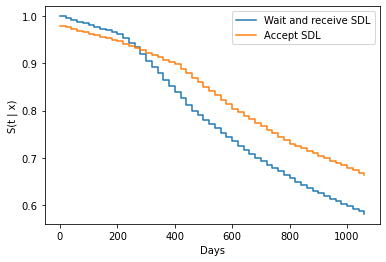

In [23]:
surv260_3yrs.plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Days')
plt.xticks(np.arange(55),[ 0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,
                         800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080])
plt.locator_params(axis='x',nbins=6)
plt.legend(["Wait and receive SDL","Accept SDL"])
plt.savefig("D:/UNOS_NEW/days260 curves for article final2_redo.jpg")